In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados
Topologia configurada com sucesso para slices!


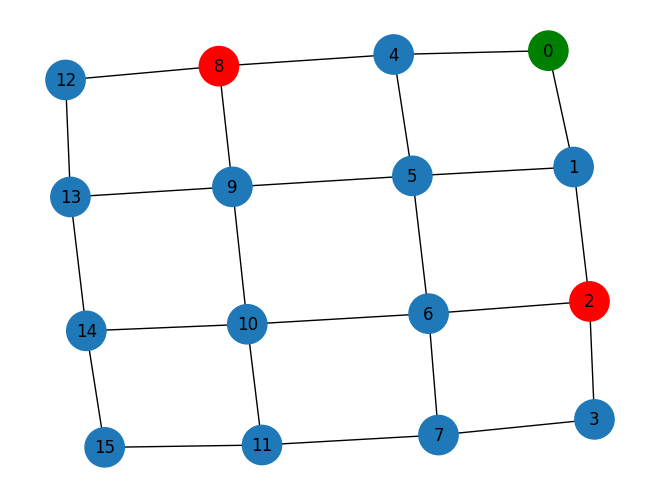

Final Slice 1 Paths: [[8, 4, 0]]
Final Slice 2 Paths: [[2, 6, 5, 4, 0]]


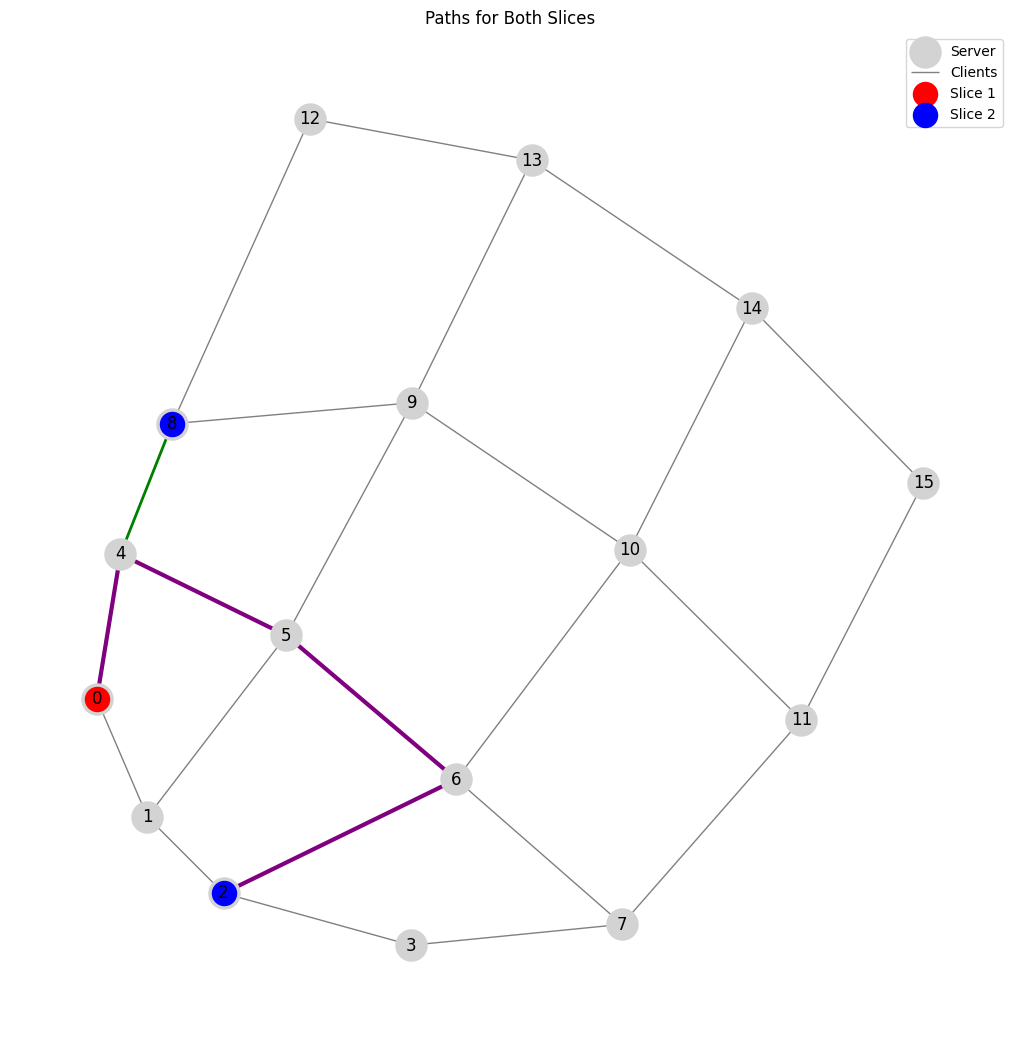

In [2]:
rede = Network()
controlador = Controller(rede)

# Configura uma grade 4x4
clients = [8, 2]
server = 0
rede.set_topology_for_slices(graph_type='grade', dimensions=(4, 4), clients=clients, server=server)


rede.draw()

# Executa a simulação de slices
rede.run_slice_simulation(clients=clients, server=server)
Logger.activate(Logger)



In [3]:
slice_1_paths = rede.final_slice_1_paths  
slice_2_paths = rede.final_slice_2_paths  

controlador.initialize_slices(network=rede, clients=[14,2], server=0, protocols=["BFK_BQC", "AC_BQC"], slice_1_paths=slice_1_paths, slice_2_paths=slice_2_paths)

for _ in range(3):
    protocol = random.choice(["BFK_BQC", "AC_BQC"])  
    if protocol == "BFK_BQC":
        alice_id = 8
        slice_path = rede.final_slice_1_paths[0]  
    elif protocol == "AC_BQC":
        alice_id = 2
        slice_path = rede.final_slice_2_paths[0]  
    bob_id = 0
    num_qubits = random.randint(3, 6)
    num_gates = random.randint(10, 20)

    # Passa o slice_path para garantir a rota correta na requisição
    rede.generate_request_slice(alice_id, bob_id, num_qubits, num_gates, protocol=protocol, slice_path=slice_path,scenario=2)

scheduled_timeslots = rede.send_requests_to_controller(controlador)
slice_paths = controlador.slices  
rede.execute_scheduled_requests(scheduled_timeslots)


2024-12-17 00:43:24,131: Slice slice_1 configurado para protocolo BFK_BQC com rotas: {'client': [8, 4, 0]}
2024-12-17 00:43:24,133: Slice slice_2 configurado para protocolo AC_BQC com rotas: {'client': [2, 6, 5, 4, 0]}
2024-12-17 00:43:24,431: Circuito aleatório gerado com 3 qubits e 14 portas. Instruções sobre o circuito.
2024-12-17 00:43:24,433: Instrução: {'operation': 'h', 'qubits': [2]}
2024-12-17 00:43:24,434: Instrução: {'operation': 'cz', 'qubits': [0, 1]}
2024-12-17 00:43:24,434: Instrução: {'operation': 'z', 'qubits': [2]}
2024-12-17 00:43:24,435: Instrução: {'operation': 'cx', 'qubits': [0, 1]}
2024-12-17 00:43:24,436: Instrução: {'operation': 'cx', 'qubits': [1, 2]}
2024-12-17 00:43:24,437: Instrução: {'operation': 'cz', 'qubits': [1, 0]}
2024-12-17 00:43:24,438: Instrução: {'operation': 'swap', 'qubits': [1, 0]}
2024-12-17 00:43:24,440: Instrução: {'operation': 'h', 'qubits': [0]}
2024-12-17 00:43:24,440: Instrução: {'operation': 't', 'qubits': [2]}
2024-12-17 00:43:24,440

                            ┌───┐┌───┐              
q_0: ──■────■─────────■───X─┤ H ├┤ X ├──────────────
       │  ┌─┴─┐       │   │ └───┘└─┬─┘      ┌───┐   
q_1: ──■──┤ X ├──■────■───X────────■───■──X─┤ S ├─■─
     ┌───┐├───┤┌─┴─┐┌───┐              │  │ └───┘ │ 
q_2: ┤ H ├┤ Z ├┤ X ├┤ T ├──────────────■──X───────■─
     └───┘└───┘└───┘└───┘                           
     ┌───┐┌───┐             ┌───┐   ┌───┐
q_0: ┤ Z ├┤ T ├──────────X──┤ X ├─■─┤ H ├
     └───┘├───┤          │  └───┘ │ └───┘
q_1: ──■──┤ T ├─────■────┼────────┼──────
       │  └───┘     │    │        │ ┌───┐
q_2: ──┼────────X───■────X────────■─┤ X ├
       │  ┌───┐ │ ┌───┐             └───┘
q_3: ──┼──┤ Y ├─┼─┤ T ├──────────────────
       │  └───┘ │ ├───┤┌───┐             
q_4: ──■────────X─┤ Y ├┤ H ├─────────────
                  └───┘└───┘             


2024-12-17 00:43:24,565: Circuito aleatório gerado com 5 qubits e 15 portas. Instruções sobre o circuito.
2024-12-17 00:43:24,566: Instrução: {'operation': 'z', 'qubits': [0]}
2024-12-17 00:43:24,566: Instrução: {'operation': 'cz', 'qubits': [1, 4]}
2024-12-17 00:43:24,567: Instrução: {'operation': 't', 'qubits': [1]}
2024-12-17 00:43:24,568: Instrução: {'operation': 'swap', 'qubits': [2, 4]}
2024-12-17 00:43:24,569: Instrução: {'operation': 'cz', 'qubits': [1, 2]}
2024-12-17 00:43:24,570: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-17 00:43:24,570: Instrução: {'operation': 'swap', 'qubits': [0, 2]}
2024-12-17 00:43:24,570: Instrução: {'operation': 'y', 'qubits': [3]}
2024-12-17 00:43:24,571: Instrução: {'operation': 'x', 'qubits': [0]}
2024-12-17 00:43:24,571: Instrução: {'operation': 'y', 'qubits': [4]}
2024-12-17 00:43:24,573: Instrução: {'operation': 'cz', 'qubits': [0, 2]}
2024-12-17 00:43:24,573: Instrução: {'operation': 'h', 'qubits': [4]}
2024-12-17 00:43:24,574: Instr

          ┌───┐                ┌───┐   
q_0: ─────┤ X ├───────■───X──■─┤ H ├─■─
          └─┬─┘       │   │  │ └───┘ │ 
q_1: ───────┼─────────┼───┼──┼───────┼─
     ┌───┐  │  ┌───┐  │   │  │       │ 
q_2: ┤ H ├──┼──┤ X ├──┼───┼──┼───────┼─
     ├───┤  │  └───┘  │   │  │       │ 
q_3: ┤ Z ├──■─────────┼───┼──┼───────┼─
     ├───┤┌───┐┌───┐┌─┴─┐ │  │       │ 
q_4: ┤ S ├┤ Z ├┤ T ├┤ X ├─┼──■───────■─
     └───┘└───┘└───┘└───┘ │            
q_5: ─────────────────────X────────────
                                       
Todas as requisições foram enviadas para o controlador.
Pares EPRs adicionados
Hosts inicializados


2024-12-17 00:43:24,769: Qubit 162 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-17 00:43:24,775: Qubit 464 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-17 00:43:24,776: Qubit 735 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-17 00:43:24,776: Qubit 849 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-17 00:43:24,777: Alice recebeu 5 qubits. Total: 5 qubits na memória.
2024-12-17 00:43:24,778: Instruções clássicas enviadas pelo Cliente: ['Z', 'X', 'Y', 'X', 'X']
2024-12-17 00:43:24,779: Rota calculada para o transporte: [2, 6, 5, 4, 0]
2024-12-17 00:43:24,780: Usando a rota fornecida: [2, 6, 5, 4, 0]
2024-12-17 00:43:24,781: Ida: Criando 5 pares EPRs no segmento 2 -> 6.
2024-12-17 00:43:24,782: Par EPR <quantumnet.objects.epr.Epr object at 0x000002017AB47E90> adicionado ao canal (2, 6).
2024-12-17 00:43:24,783: Par EPR <quantumnet.objects.epr.Epr object at 0x000002017AB44210> adicionado ao canal (2, 6).
2024-12-17 00:43:24,784: Par EPR <quantumnet.objects.epr.Epr object at 0x0

Pares EPRs adicionados
Hosts inicializados


2024-12-17 00:43:25,187: Fidelidade do EPR 2->6: 0.9605960100000001
2024-12-17 00:43:25,188: Fidelidade do EPR 6->5: 0.9605960100000001
2024-12-17 00:43:25,188: Fidelidade do EPR 5->4: 0.9605960100000001
2024-12-17 00:43:25,189: Fidelidade do EPR 4->0: 0.9605960100000001
2024-12-17 00:43:25,190: Produto das fidelidades para rota [2, 6, 5, 4, 0]: 0.8514577710948759
2024-12-17 00:43:25,191: Fidelidade atual da rota: 0.8514577710948759
2024-12-17 00:43:25,192: Pares EPRs restantes no segmento 2 -> 6: 23
2024-12-17 00:43:25,192: Pares EPRs restantes no segmento 6 -> 5: 23
2024-12-17 00:43:25,192: Pares EPRs restantes no segmento 5 -> 4: 23
2024-12-17 00:43:25,193: Pares EPRs restantes no segmento 4 -> 0: 26
2024-12-17 00:43:25,194: Fidelidade final: 0.7916 (F_qubit: 0.9297 * F_rota: 0.8515)
2024-12-17 00:43:25,194: Fidelidade do EPR 2->6: 0.9509900499
2024-12-17 00:43:25,195: Fidelidade do EPR 6->5: 0.9509900499
2024-12-17 00:43:25,195: Fidelidade do EPR 5->4: 0.9509900499
2024-12-17 00:43

In [4]:
controlador.print_report(scheduled_timeslots, slice_paths)


=== Relatório de Agendamento e Execução de Requisições ===

Timeslot 1:
  - Alice ID: 8, Bob ID: 0, Protocolo: BFK_BQC, Nº de Qubits: 3, Caminho do slice_1: {'client': [8, 4, 0]}
  - Alice ID: 2, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 5, Caminho do slice_2: {'client': [2, 6, 5, 4, 0]}
------------------------------------------------------------
Timeslot 2:
  - Alice ID: 2, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 6, Caminho do slice_2: {'client': [2, 6, 5, 4, 0]}
------------------------------------------------------------

=== Fim do Relatório ===



In [5]:
rede.get_total_useds_eprs()

2024-12-17 00:43:25,227: Eprs criados na camada PhysicalLayer: 20
2024-12-17 00:43:25,229: Eprs usados na camada LinkLayer: 0
2024-12-17 00:43:25,230: Eprs usados na camada NetworkLayer: 0
2024-12-17 00:43:25,231: Eprs usados na camada ApplicationLayer: 66


86

In [6]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.8373


0.8373190053229939

In [7]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9434
0.8712
0.8725
0.9652
0.8500
0.8722
0.7926
0.7382
0.9087
0.8003
0.8212
0.7462
0.6950
0.9418
0.8445
0.8407
0.7765
0.7916
